## TASK 1 : Prediction using Supervised Machine Learning
### Description: Predict the percentage of marks a student is expected to score based on the number of hours they studied.
### Executed by: Salem Jguirim

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Loading and Reading The Data Set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spark Tasks/Task 1/student_scores - student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory Data Analysis (EDA)

In [4]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.isna().sum()

,0
Hours,0
Scores,0


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [9]:
df.shape

(25, 2)

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df['Hours'].value_counts()

,count
Hours,
2.5,2
2.7,2
4.5,1
6.9,1
3.8,1
4.8,1
7.4,1
6.1,1
1.9,1


In [13]:
df['Scores'].value_counts()

,count
Scores,
30,3
21,1
41,1
76,1
35,1
54,1
69,1
67,1
24,1


<ipython-input-14-9dc8bb13a98c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_amount_values = sns.barplot(x=x_barplot, y=y_barplot, palette="coolwarm")


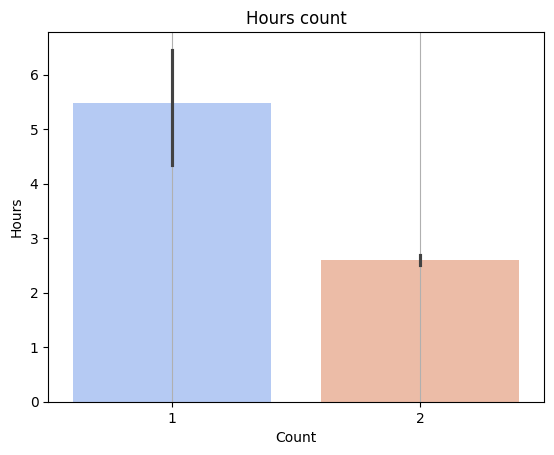

In [14]:
# Bar plot was made to see better numbers above
x_barplot = df['Hours'].value_counts().to_list()
y_barplot = df['Hours'].value_counts().index.to_list()

barplot_amount_values = sns.barplot(x=x_barplot, y=y_barplot, palette="coolwarm")

plt.title('Hours count')
plt.xlabel('Count')
plt.ylabel('Hours')
plt.grid(True, 'major', 'x')
plt.show()

<ipython-input-15-79f1b480087f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_amount_values = sns.barplot(x=x_barplot, y=y_barplot, palette="coolwarm")


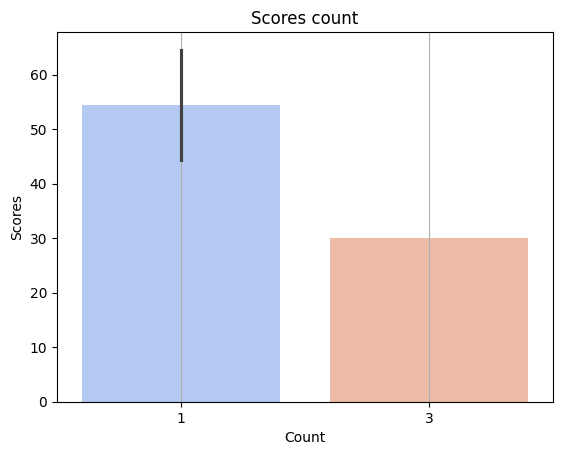

In [15]:
# Bar plot was made to see better numbers above
x_barplot = df['Scores'].value_counts().to_list()
y_barplot = df['Scores'].value_counts().index.to_list()

barplot_amount_values = sns.barplot(x=x_barplot, y=y_barplot, palette="coolwarm")

plt.title('Scores count')
plt.xlabel('Count')
plt.ylabel('Scores')
plt.grid(True, 'major', 'x')
plt.show()

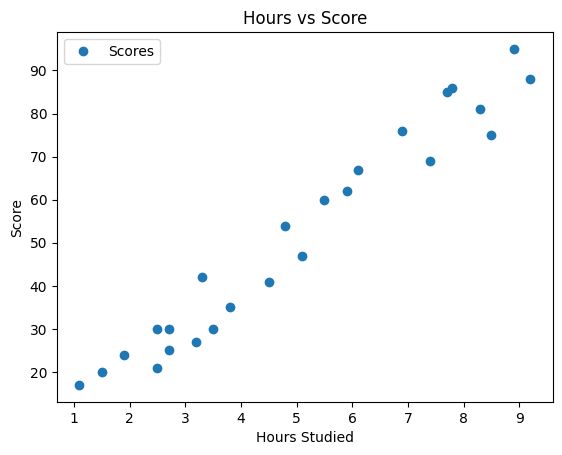

In [16]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [17]:
# We split the data to attributes/features 'x' and outputs/labels 'y'
x = df[["Hours"]].values
y = df[["Scores"]].values

In [18]:
# we have to slpit the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train: [[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
X_test: [[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
y_train: [[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]
y_test: [[81]
 [30]
 [21]
 [76]
 [62]]


### Training Data

In [19]:
# Import the LinearRegression class

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

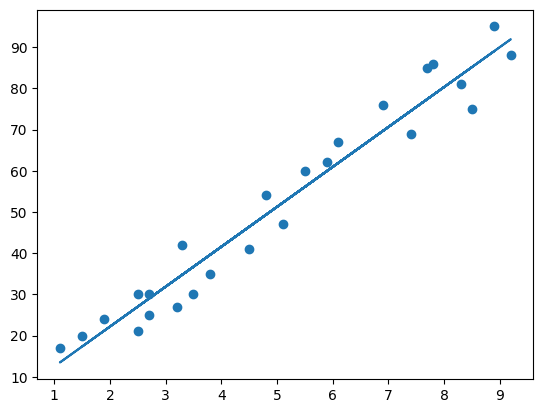

In [20]:
#Plotting the regression line
line= model.coef_*x + model.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [21]:
#prediciting the scores
y_pred= model.predict(X_test)
#Convert to 1D array
y_test = y_test.ravel()
y_pred = y_pred.ravel()
#comparing the prediction vs the actual
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(compare)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [22]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
own_pred= model.predict([[9.25]])
print(own_pred)

[[92.38611528]]


### Evaluating the model

In [23]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 3.9207511902099244
Mean Squared Error (MSE): 18.943211722315272
Root Mean Squared Error (RMSE): 4.352380006653288
R-squared (R²): 0.9678055545167994
